### Deep Convnet

|Example Name|[intro](https://github.com/serhatsoyer/py4ML/blob/main/examples/autoencoders/intro.ipynb)|Deep Convnet (This Example)|
|-|-|-|
|Model Type|Shallow Dense|Deep 2D Conv.|
|Total params|50,992|4,385|
|Total time (min)|1.0|10.3|
|Num of epochs|50|50|  

Autoencoder result in this example seems to be better but training of deep 2D conv. layers take much longer  

Previous example: [/examples/autoencoders/sparse.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/autoencoders/sparse.ipynb)  
Modified from: [blog.keras.io/building-autoencoders-in-keras](https://blog.keras.io/building-autoencoders-in-keras.html)  
It was the last example. [Return to the main page](https://github.com/serhatsoyer/py4ML)

In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same', name='final')(x)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

num_of_dims = np.prod(encoder.output.shape[1:])
print(f'{num_of_dims = }\n')

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Create the decoder model
decoder = keras.Model(inputs=encoder.get_layer('final').output, outputs=autoencoder.output)

print('autoencoder:'); autoencoder.summary()

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

num_of_dims = 128

autoencoder:
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                 

2022-12-30 14:39:53.364643: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-30 14:39:53.364748: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
print('encoder:'); encoder.summary()

encoder:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)        

In [4]:
print('decoder:'); decoder.summary()

decoder:
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 4, 8)]         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 8, 8, 8)          0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 8)           584       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)   

In [5]:
(x_train, _), (x_test, _) = mnist.load_data() # Labels ignored
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(f'{x_train.shape = }')
print(f'{x_test.shape = }')

x_train.shape = (60000, 28, 28, 1)
x_test.shape = (10000, 28, 28, 1)


In [6]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50


2022-12-30 14:39:54.009851: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-30 14:39:54.394080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - ETA: 0s - loss: 0.2131

2022-12-30 14:40:08.500640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 16s 28ms/step - loss: 0.2131 - val_loss: 0.1435
Epoch 2/50
469/469 [==============================] - 13s 27ms/step - loss: 0.1327 - val_loss: 0.1233
Epoch 3/50
469/469 [==============================] - 13s 27ms/step - loss: 0.1201 - val_loss: 0.1156
Epoch 4/50
469/469 [==============================] - 13s 27ms/step - loss: 0.1147 - val_loss: 0.1115
Epoch 5/50
469/469 [==============================] - 13s 27ms/step - loss: 0.1112 - val_loss: 0.1086
Epoch 6/50
469/469 [==============================] - 12s 26ms/step - loss: 0.1088 - val_loss: 0.1064
Epoch 7/50
469/469 [==============================] - 13s 27ms/step - loss: 0.1068 - val_loss: 0.1052
Epoch 8/50
469/469 [==============================] - 12s 26ms/step - loss: 0.1052 - val_loss: 0.1030
Epoch 9/50
469/469 [==============================] - 13s 27ms/step - loss: 0.1038 - val_loss: 0.1020
Epoch 10/50
469/469 [==============================] - 12s 26ms/step - loss: 0.1026 - val_los

In [7]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test, verbose=0)
decoded_imgs = decoder.predict(encoded_imgs, verbose=0)
print(f'{encoded_imgs.mean() = }')
print(f'{encoded_imgs.std() = }')

2022-12-30 14:50:11.507259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-30 14:50:12.015862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


encoded_imgs.mean() = 2.8696058
encoded_imgs.std() = 2.2790337


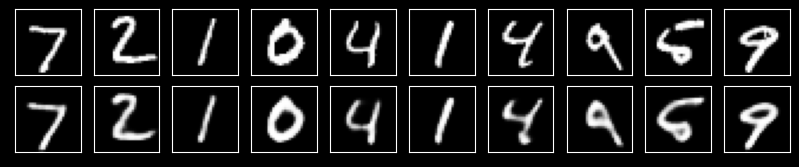

In [8]:
num_of_digits_to_display = 10
plt.style.use('dark_background')
fig = plt.figure(figsize=(10, 2))
fig.subplots_adjust(hspace=0)
for digit_idx in range(num_of_digits_to_display):
    # Display original
    ax = plt.subplot(2, num_of_digits_to_display, digit_idx + 1)
    plt.imshow(x_test[digit_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, num_of_digits_to_display, digit_idx + 1 + num_of_digits_to_display)
    plt.imshow(decoded_imgs[digit_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Previous example: [/examples/autoencoders/sparse.ipynb](https://github.com/serhatsoyer/py4ML/blob/main/examples/autoencoders/sparse.ipynb)  
Modified from: [blog.keras.io/building-autoencoders-in-keras](https://blog.keras.io/building-autoencoders-in-keras.html)  
It was the last example. [Return to the main page](https://github.com/serhatsoyer/py4ML)